In [2]:
import pandas as pd
import numpy as np

# Day 1

Fuel required to launch a given module is based on its mass. Specifically, to find the fuel required for a module, take its mass, divide by three, round down, and subtract 2.

In [25]:
df = pd.read_csv('day1.txt', sep='\n', header=None)

In [32]:
def fuel(mass):
    return int(mass / 3) - 2

np.sum(df.apply(lambda x: fuel(x[0]), axis=1))

3442987

In [40]:
def fuel_recursive(mass):
    
    total_fuel = fuel(mass)
    mass = total_fuel
    mass = fuel(mass)

    while (mass > 0):
        total_fuel += mass
        mass = fuel(mass)
    return total_fuel

In [43]:
np.sum(df.apply(lambda x: fuel_recursive(x[0]), axis=1))

5161601

# Day 2

In [76]:
def opcode(l, start_opcode, func):
    p1 = l[1 + start_opcode]
    p2 = l[2 + start_opcode]
    p3 = l[3 + start_opcode]
    l[p3] = func(l[p1], l[p2])

def apply_opcode(l, start_opcode):
    if l[start_opcode] == 1:
        opcode(l, start_opcode, lambda x, y: x + y)
    elif l[start_opcode] == 2:
        opcode(l, start_opcode, lambda x, y: x * y)
    

In [85]:
l = list(pd.read_csv('day2.txt', sep=',', header=None).values)[0]
l[1] = 12
l[2] = 2

start_opcode = 0
while (l[start_opcode] != 99):
    apply_opcode(l, start_opcode)
    start_opcode += 4
print(l[0])

7594646


In [88]:
answer = 19690720

def get_answer(noun, verb):
    l = list(pd.read_csv('day2.txt', sep=',', header=None).values)[0]
    l[1] = noun
    l[2] = verb

    start_opcode = 0
    while (l[start_opcode] != 99):
        apply_opcode(l, start_opcode)
        start_opcode += 4
    return l[0]

def find_noun_verb(answer):
    for noun in range(0, 99):
        for verb in range(0, 99):
            if get_answer(noun, verb) == answer:
                return (noun, verb)
            
noun, verb = find_noun_verb(answer)

print(noun, verb)
print(100 * noun + verb)

7594646

# Day 3

In [164]:
class Wire:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.coordinates = []
    
    def read_path(self, path):
        for c in path:
            self.read(c)
        return set(self.coordinates)
    
    def read(self, c):
        direction = c[0]
        n = int(c[1:])
        if direction == "R":
            self.move_horizontal(self.x + n, 1)
        elif direction == "L":
            self.move_horizontal(self.x - n, -1)
        elif direction == "U":
            self.move_vertical(self.y + n, 1)
        elif direction == "D":
            self.move_vertical(self.y - n, -1)
        
    def move_horizontal(self, end_x, direction):
        for i in range(self.x, end_x, direction):
            self.coordinates.append((i, self.y))
        self.x = end_x
    
    def move_vertical(self, end_y, direction):
        for i in range(self.y, end_y, direction):
            self.coordinates.append((self.x, i))
        self.y = end_y
    
    def steps_to_location(self, x, y):
        if (x, y) not in self.coordinates:
            print("Not found")
            return
        return self.coordinates.index((x, y))
    
    def __repr__(self):
        return f"{self.x}, {self.y}"

df = pd.read_csv('./day3.txt', header=None)
    
p1 = list(df.iloc[0, :])
p2 = list(df.iloc[1, :])    

w1 = Wire()
c1 = w1.read_path(p1)

w2 = Wire()
c2 = w2.read_path(p2)

intersections = c1.intersection(c2)
    

In [165]:
results = {}

for x, y in intersections:
    results[abs(x) + abs(y)] = (x, y)

sorted(results)[1]

1211

In [178]:
w1.coordinates.index((1, 0))
total_steps = {}

for x, y in intersections:
    total_steps[w1.steps_to_location(x, y) + w2.steps_to_location(x, y)] = (x, y)
    
sorted(total_steps)[1]

101386

# Day 4

* It is a six-digit number.
* The value is within the range given in your puzzle input.
* Two adjacent digits are the same (like 22 in 122345).
* Going from left to right, the digits never decrease; they only ever increase or stay the same (like 111123 or 135679).

Input: 264360-746325

In [327]:
puzzle_input = range(264360, 746325)

def six_digits(n):
    return n >= 10**5 and n < 10**6

def two_same_digits(n):
    return np.any([n[i] == n[i+1] for i in range(len(n) - 1)])

def increasing_digits(n):
    return np.all([n[i] <= n[i+1] for i in range(len(n) - 1)])

def part_a(i):
    if not six_digits(i):
        return False
    if not two_same_digits(str(i)):
        return False
    if not increasing_digits(str(i)):
        return False
    return True

result = [i for i in puzzle_input if part_a(i)]
        
len(result)

945

In [325]:
def only_two_same_digits(n):
    t = "x" + n + "x"
    return np.any([ (t[i] == t[i+1]) 
               and  (t[i+1] != t[i+2])
               and  (t[i-1] != t[i]) for i in range(1, len(n))])

def part_b(i):
    if not six_digits(i):
        return False
    if not only_two_same_digits(str(i)):
        return False
    if not increasing_digits(str(i)):
        return False
    return True

result = [i for i in puzzle_input if part_b(i)]

len(result)

617

# Day 5

* Opcode 3 takes a single integer as input and saves it to the position given by its only parameter. For example, the instruction 3,50 would take an input value and store it at address 50.
* Opcode 4 outputs the value of its only parameter. For example, the instruction 4,50 would output the value at address 50.

In [4]:
class Terminal:
    
    def __init__(self, filename: str):
        self.filename = filename
        self.l = []
        
        self.end_signal = 99
        self.pointer = 0
        
    def run(self, user_input):
        
        self.l = list(pd.read_csv(self.filename, sep=',', header=None).values)[0]
        
        while (self.l[self.pointer] != self.end_signal):  
            self.pointer += self.apply_opcode(user_input)
                
    def set_opcode(self, func, param_modes: list):
        param1 = self.get_param(self.l[1 + self.pointer], param_modes[0])
        param2 = self.get_param(self.l[2 + self.pointer], param_modes[1])
        param3 = self.l[3 + self.pointer]
        self.l[param3] = func(param1, param2)

    def get_param(self, p1, mode):    
        if mode == 0:
            return self.l[p1]
        return p1

    def opcode_input(self, user_input):
        p1 = self.l[self.pointer + 1]
        self.l[p1] = user_input

    def opcode_output(self, param_modes: list):
        p1 = self.l[self.pointer + 1]
        param1 = self.get_param(p1, param_modes[0])
        print(f"Test: {param1}")

    def parse_param_modes(self, param_str: str):

        param_str = list(reversed(param_str))
        opcode = int(param_str[0])
        param_modes = [0] * 3
        for i in range(0, len(param_str) - 2):
            param_modes[i] = int(param_str[i + 2])
        return opcode, param_modes

    def apply_opcode(self, user_input):
        opcode, param_modes = self.parse_param_modes(str(self.l[self.pointer]))
        if opcode == 1:
            self.set_opcode(lambda x, y: x + y, param_modes)
            return 4
        elif opcode == 2:
            self.set_opcode(lambda x, y: x * y, param_modes)
            return 4
        elif opcode == 3:
            self.opcode_input(user_input)
            return 2
        elif opcode == 4:
            self.opcode_output(param_modes)
            return 2
        else:
            print(f"Error: {self.l[self.pointer]}")
            return 0
        
test = Terminal('day5.txt')
test.run(user_input=1)

Test: 0
Test: 0
Test: 0
Test: 0
Test: 0
Test: 0
Test: 0
Test: 0
Test: 0
Test: 5346030


## Part b

* Opcode 5 is jump-if-true: if the first parameter is non-zero, it sets the instruction pointer to the value from the second parameter. Otherwise, it does nothing.
* Opcode 6 is jump-if-false: if the first parameter is zero, it sets the instruction pointer to the value from the second parameter. Otherwise, it does nothing.
* Opcode 7 is less than: if the first parameter is less than the second parameter, it stores 1 in the position given by the third parameter. Otherwise, it stores 0.
* Opcode 8 is equals: if the first parameter is equal to the second parameter, it stores 1 in the position given by the third parameter. Otherwise, it stores 0.

In [72]:
class Terminal:
    
    def __init__(self, filename: str):
        self.filename = filename
        self.l = []
        
        self.end_signal = 99
        self.pointer = 0
        
    def run(self, user_input):
        
        self.l = list(pd.read_csv(self.filename, sep=',', header=None).values)[0]
        
        while (self.l[self.pointer] != self.end_signal):  
            self.apply_opcode(user_input)
            
    def run_test(self, test_list, user_input):
        self.l = test_list
        
        while (self.l[self.pointer] != self.end_signal):  
            self.apply_opcode(user_input)
                
    def set_opcode(self, func, param_modes: list):
        param1 = self.get_param(1 + self.pointer, param_modes[0])
        param2 = self.get_param(2 + self.pointer, param_modes[1])
        param3 = self.l[3 + self.pointer]
        self.l[param3] = func(param1, param2)
        self.pointer += 4

    def get_param(self, location, mode):
        p1 = self.l[location]
        if mode == 0:
            return self.l[p1]
        return p1

    def opcode_input(self, user_input):
        p1 = self.l[self.pointer + 1]
        self.l[p1] = user_input
        self.pointer += 2

    def opcode_output(self, param_modes: list):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        print(f"Test: {param1}")
        self.pointer += 2
        
    def opcode_jump_if(self, param_modes: list, func):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        param2 = self.get_param(self.pointer + 2, param_modes[1])
        
        if func(param1):
            self.pointer = param2
        else:
            self.pointer += 3
            
    def opcode_compare(self, param_modes: list, func):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        param2 = self.get_param(self.pointer + 2, param_modes[1])
        param3 = self.l[self.pointer + 3]
        if func(param1, param2):
            self.l[param3] = 1
        else:
            self.l[param3] = 0
        self.pointer += 4

    def parse_param_modes(self, param_str: str):

        param_str = list(reversed(param_str))
        opcode = int(param_str[0])
        param_modes = [0] * 3
        for i in range(0, len(param_str) - 2):
            param_modes[i] = int(param_str[i + 2])
        return opcode, param_modes

    def apply_opcode(self, user_input):
        opcode, param_modes = self.parse_param_modes(str(self.l[self.pointer]))
        if opcode == 1:
            self.set_opcode(lambda x, y: x + y, param_modes)
        elif opcode == 2:
            self.set_opcode(lambda x, y: x * y, param_modes)
        elif opcode == 3:
            self.opcode_input(user_input)
        elif opcode == 4:
            self.opcode_output(param_modes)
        elif opcode == 5:
            self.opcode_jump_if(param_modes, lambda x: x != 0)
        elif opcode == 6:
            self.opcode_jump_if(param_modes, lambda x: x == 0)
        elif opcode == 7:
            self.opcode_compare(param_modes, lambda x, y: x < y)
        elif opcode == 8:
            self.opcode_compare(param_modes, lambda x, y: x == y)
        else:
            print(f"Error: {self.l[self.pointer]}")

terminal2 = Terminal('day5.txt')
terminal2.run(5)       

Test: 513116


# Day 6

In [70]:
orbit_list = pd.read_csv('day6.txt', header=None).apply(lambda x: x[0].split(')'), axis=1)

orbits_dict = { orb[1] : orb[0] for orb in orbit_list }

def count_orbits(orbit, orbits_dict):
    count = 0
    while orbit in orbits_dict:
        orbit = orbits_dict[orbit]
        count += 1
    return count

unique_orbits = set(orbits_dict.keys())
sum([count_indirect_orbits(orbit, orbits_dict) for orbit in unique_orbits])

145250

In [61]:
orbit_list = pd.read_csv('day6.txt', header=None).apply(lambda x: x[0].split(')'), axis=1)

orbits_dict = { orb[1] : orb[0] for orb in orbit_list }

def list_orbits(orbit, orbits_dict):
    path = []
    while orbit in orbits_dict:
        orbit = orbits_dict[orbit]
        path.append(orbit)
    return path

def count_a_b(orbit_a, orbit_b, orbits_dict):
    path_a = list_orbits(orbit_a, orbits_dict)
    path_b = list_orbits(orbit_b, orbits_dict)
    i = [o for o in path_a if o in path_b][0]
    path = path_a[:path_a.index(i) + 1] + path_b[:path_b.index(i)]
    return len(path) - 1

count_a_b("YOU", "SAN", orbits_dict)

274

# Day 7

In [24]:
from itertools import permutations


class Terminal:
    
    def __init__(self, filename: str):
        self.filename = filename
        self.l = []
        
        self.end_signal = 99
        self.pointer = 0
        self.user_inputs = []
        self.input_pointer = 0
        
        self.output = []
        
    def run(self, user_inputs: list):
        
        self.l = list(pd.read_csv(self.filename, sep=',', header=None).values)[0]
        self.user_inputs = user_inputs
        
        while (self.l[self.pointer] != self.end_signal):  
            self.apply_opcode()
            
    def run_test(self, test_list: list, user_inputs: list):
        self.l = test_list
        self.user_inputs = user_inputs

        while (self.l[self.pointer] != self.end_signal):  
            self.apply_opcode()
                
    def set_opcode(self, func, param_modes: list):
        param1 = self.get_param(1 + self.pointer, param_modes[0])
        param2 = self.get_param(2 + self.pointer, param_modes[1])
        param3 = self.l[3 + self.pointer]
        self.l[param3] = func(param1, param2)
        self.pointer += 4

    def get_param(self, location, mode):
        p1 = self.l[location]
        if mode == 0:
            return self.l[p1]
        return p1

    def opcode_input(self):
        p1 = self.l[self.pointer + 1]
        self.l[p1] = self.user_inputs[self.input_pointer]
        self.input_pointer += 1
        self.pointer += 2
        print("user input")

    def opcode_output(self, param_modes: list):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        print(f"Test: {param1}")
        self.output.append(param1)
        self.pointer += 2
        
    def opcode_jump_if(self, param_modes: list, func):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        param2 = self.get_param(self.pointer + 2, param_modes[1])
        
        if func(param1):
            self.pointer = param2
        else:
            self.pointer += 3
            
    def opcode_compare(self, param_modes: list, func):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        param2 = self.get_param(self.pointer + 2, param_modes[1])
        param3 = self.l[self.pointer + 3]
        if func(param1, param2):
            self.l[param3] = 1
        else:
            self.l[param3] = 0
        self.pointer += 4

    def parse_param_modes(self, param_str: str):

        param_str = list(reversed(param_str))
        opcode = int(param_str[0])
        param_modes = [0] * 3
        for i in range(0, len(param_str) - 2):
            param_modes[i] = int(param_str[i + 2])
        return opcode, param_modes

    def apply_opcode(self):
        opcode, param_modes = self.parse_param_modes(str(self.l[self.pointer]))
        if opcode == 1:
            self.set_opcode(lambda x, y: x + y, param_modes)
        elif opcode == 2:
            self.set_opcode(lambda x, y: x * y, param_modes)
        elif opcode == 3:
            self.opcode_input()
        elif opcode == 4:
            self.opcode_output(param_modes)
        elif opcode == 5:
            self.opcode_jump_if(param_modes, lambda x: x != 0)
        elif opcode == 6:
            self.opcode_jump_if(param_modes, lambda x: x == 0)
        elif opcode == 7:
            self.opcode_compare(param_modes, lambda x, y: x < y)
        elif opcode == 8:
            self.opcode_compare(param_modes, lambda x, y: x == y)
        else:
            print(f"Error: {self.l[self.pointer]}")

def run_sequence(signal):
    """ Runs a sequence of terminals """
    prev_output = 0
    for sign in signal:
        terminal = Terminal('day7.txt')
        terminal.run([sign, prev_output])
        prev_output = terminal.output[0]
    return prev_output

# Tries all different permutations and returns the maximum
max_output = 0
max_signal = []
for signal in permutations([0, 1, 2, 3, 4]):
    output = run_sequence(signal)
    if output > max_output:
        max_signal = signal
        max_output = output

user input
user input
Test: 2
user input
user input
Test: 32
user input
user input
Test: 136
user input
user input
Test: 1690
user input
user input
Test: 8460
user input
user input
Test: 2
user input
user input
Test: 32
user input
user input
Test: 136
user input
user input
Test: 690
user input
user input
Test: 8338
user input
user input
Test: 2
user input
user input
Test: 32
user input
user input
Test: 442
user input
user input
Test: 1776
user input
user input
Test: 8890
user input
user input
Test: 2
user input
user input
Test: 32
user input
user input
Test: 442
user input
user input
Test: 2220
user input
user input
Test: 8888
user input
user input
Test: 2
user input
user input
Test: 32
user input
user input
Test: 170
user input
user input
Test: 688
user input
user input
Test: 8314
user input
user input
Test: 2
user input
user input
Test: 32
user input
user input
Test: 170
user input
user input
Test: 2098
user input
user input
Test: 8400
user input
user input
Test: 2
user input
user in

user input
user input
Test: 11304
user input
user input
Test: 8
user input
user input
Test: 42
user input
user input
Test: 220
user input
user input
Test: 904
user input
user input
Test: 10906
user input
user input
Test: 8
user input
user input
Test: 42
user input
user input
Test: 220
user input
user input
Test: 2698
user input
user input
Test: 10816
user input
user input
Test: 8
user input
user input
Test: 56
user input
user input
Test: 282
user input
user input
Test: 3442
user input
user input
Test: 17220
user input
user input
Test: 8
user input
user input
Test: 56
user input
user input
Test: 282
user input
user input
Test: 1420
user input
user input
Test: 17098
user input
user input
Test: 8
user input
user input
Test: 56
user input
user input
Test: 730
user input
user input
Test: 3652
user input
user input
Test: 18270
user input
user input
Test: 8
user input
user input
Test: 56
user input
user input
Test: 730
user input
user input
Test: 3660
user input
user input
Test: 18302
user in

user input
user input
Test: 64
user input
user input
Test: 322
user input
user input
Test: 3922
user input
user input
Test: 15696
user input
user input
Test: 10
user input
user input
Test: 64
user input
user input
Test: 264
user input
user input
Test: 1322
user input
user input
Test: 15922
user input
user input
Test: 10
user input
user input
Test: 64
user input
user input
Test: 264
user input
user input
Test: 3226
user input
user input
Test: 16132
user input
user input
Test: 10
user input
user input
Test: 64
user input
user input
Test: 826
user input
user input
Test: 4132
user input
user input
Test: 16536
user input
user input
Test: 10
user input
user input
Test: 64
user input
user input
Test: 826
user input
user input
Test: 3312
user input
user input
Test: 16562
user input
user input
Test: 10
user input
user input
Test: 48
user input
user input
Test: 242
user input
user input
Test: 992
user input
user input
Test: 11962
user input
user input
Test: 10
user input
user input
Test: 48
user

In [25]:
max_output

34852

In [35]:
l = [3,15,3,16,1002,16,10,16,1,16,15,15,4,15,99,0,0]

def run_sequence_test(l, signal):
    prev_output = 0
    for sign in signal:
        terminal = Terminal('')
        terminal.run_test(l, [sign, prev_output])
        prev_output = terminal.output[0]
    return prev_output

run_sequence_test(l, [4, 3, 2, 1, 0])

user input
user input
Test: 4
user input
user input
Test: 43
user input
user input
Test: 432
user input
user input
Test: 4321
user input
user input
Test: 43210


43210

## Part B

In [150]:
import copy

class Terminal:
    
    def __init__(self, 
                 l: list):
        
        self.l = copy.deepcopy(l)
        
        self.end_signal = 99
        self.pointer = 0
        self.user_inputs = []
        self.input_pointer = 0
        
        self.output = []
        
    
    def run(self, user_inputs):
        self.user_inputs = user_inputs
        self.input_pointer = 0
        self.active = True

        while (self.active and not self.finished()):  
            self.apply_opcode()

 
    def set_opcode(self, func, param_modes: list):
        param1 = self.get_param(1 + self.pointer, param_modes[0])
        param2 = self.get_param(2 + self.pointer, param_modes[1])
        param3 = self.l[3 + self.pointer]
        self.l[param3] = func(param1, param2)
        self.pointer += 4

    def get_param(self, location, mode):
        p1 = self.l[location]
        if mode == 0:
            return self.l[p1]
        return p1

    def opcode_input(self):
        
        p1 = self.l[self.pointer + 1]
        self.l[p1] = self.user_inputs[self.input_pointer]
        self.input_pointer += 1
        self.pointer += 2
        

    def opcode_output(self, param_modes: list):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        # print(f"Test: {param1}")
        self.output.append(param1)
        self.pointer += 2
        self.active = False
        
    def opcode_jump_if(self, param_modes: list, func):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        param2 = self.get_param(self.pointer + 2, param_modes[1])
        
        if func(param1):
            self.pointer = param2
        else:
            self.pointer += 3
            
    def opcode_compare(self, param_modes: list, func):
        param1 = self.get_param(self.pointer + 1, param_modes[0])
        param2 = self.get_param(self.pointer + 2, param_modes[1])
        param3 = self.l[self.pointer + 3]
        if func(param1, param2):
            self.l[param3] = 1
        else:
            self.l[param3] = 0
        self.pointer += 4

    def parse_param_modes(self, param_str: str):

        param_str = list(reversed(param_str))
        opcode = int(param_str[0])
        param_modes = [0] * 3
        for i in range(0, len(param_str) - 2):
            param_modes[i] = int(param_str[i + 2])
        return opcode, param_modes

    def apply_opcode(self):
        opcode, param_modes = self.parse_param_modes(str(self.l[self.pointer]))
        if opcode == 1:
            self.set_opcode(lambda x, y: x + y, param_modes)
        elif opcode == 2:
            self.set_opcode(lambda x, y: x * y, param_modes)
        elif opcode == 3:
            self.opcode_input()
        elif opcode == 4:
            self.opcode_output(param_modes)
        elif opcode == 5:
            self.opcode_jump_if(param_modes, lambda x: x != 0)
        elif opcode == 6:
            self.opcode_jump_if(param_modes, lambda x: x == 0)
        elif opcode == 7:
            self.opcode_compare(param_modes, lambda x, y: x < y)
        elif opcode == 8:
            self.opcode_compare(param_modes, lambda x, y: x == y)
        else:
            print(f"Error: {self.l[self.pointer]}")
            
    def finished(self):
        return self.l[self.pointer] == self.end_signal

    
def read_file(filename):
    return list(pd.read_csv(filename, sep=',', header=None).values)[0]    

def run_feedback_loop(signal, l):
    
    def last_terminal_finished(terminals):
        return terminals[-1].finished()

    def get_signal(signal, i):
        """ Only return the signal in the first round. """
        if i >= len(signal):
            return []
        return [signal[i % len(signal)]]
    
    # Initialize terminals
    terminals = [Terminal(l) for sign in signal]
    
    prev_output = 0
    i = 0
    while not last_terminal_finished(terminals):
        idx = i % len(signal)
        terminals[idx].run(get_signal(signal, i) + [prev_output])
        prev_output = terminals[idx].output[-1]
        i += 1
    print(f"Final output: {prev_output}")
    return prev_output



l = read_file('day7.txt')

def find_max_signal(l):
    return max([
        run_feedback_loop(signal, l)
        for signal 
        in permutations([9, 8, 7, 6, 5])
    ])


find_max_signal(l)

Final output: 23522902
Final output: 23373844
Final output: 28016966
Final output: 30115066
Final output: 25471936
Final output: 29816504
Final output: 23457366
Final output: 23308308
Final output: 27918406
Final output: 29983676
Final output: 25373570
Final output: 29701498
Final output: 36939574
Final output: 39037674
Final output: 36874038
Final output: 38939308
Final output: 43168352
Final output: 43135584
Final output: 29602606
Final output: 33947174
Final output: 29569838
Final output: 33897766
Final output: 42603550
Final output: 42570782
Final output: 15256443
Final output: 15107385
Final output: 19750507
Final output: 21848607
Final output: 17205477
Final output: 21550045
Final output: 11057701
Final output: 10908643
Final output: 11352235
Final output: 11350188
Final output: 10906596
Final output: 11053608
Final output: 20339953
Final output: 22438053
Final output: 16141195
Final output: 16139148
Final output: 22433958
Final output: 18237172
Final output: 17201382
Final outpu

44282086

# Day 8

The image you received is 25 pixels wide and 6 pixels tall.

To make sure the image wasn't corrupted during transmission, the Elves would like you to find the layer that contains the fewest 0 digits. On that layer, what is the number of 1 digits multiplied by the number of 2 digits?

In [70]:
n_pixels = 25 * 6

image = []
with open("day8.txt", "r") as f:
    image = f.read().replace('\n', '')

def count_occurence(image: str, number):
    
    return np.sum([1 
      for ch 
      in image
      if ch == number])

def split_images_(input_str: str, size: int):

    return [   
        input_str[i: i+size]
        for i 
        in range(len(input_str))
        if i % size == 0
    ]
split_images = split_images_(image, n_pixels)

min_zeros_idx = np.argmin([
    count_occurence(image, '0')
    for image
    in split_images
])

selected_image = split_images[min_zeros_idx]

count_occurence(selected_image, '1') * count_occurence(selected_image, '2')

1072

## Day 8B
Extra numpy exercise?

0 is black, 1 is white, and 2 is transparent

In [92]:
n_pixels = 25 * 6

image = []
with open("day8.txt", "r") as f:
    image = f.read().replace('\n', '')

split_images = split_images_(image, n_pixels)

final_image = []
for pixel in range(n_pixels):
    for image in split_images:
        if image[pixel] in ['0', '1']:
            final_image.append(int(image[pixel]))
            break

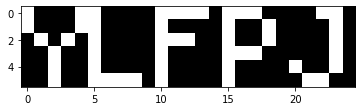

In [93]:
import matplotlib.pyplot as plt 

Blue = np.array(final_image).reshape(6, 25)# np.eye(6, dtype = int) 
plt.imshow(Blue, cmap='gray', vmin=0, vmax=1)
plt.show()